---
# Connectomes de Jonathan

Info:

* Visualization is AAL ordered, then ordered by hemisphere, with the right hemisphere inversed for symmetry.

Update:

* FCA remade from resampled SCE

Note:

* Influence of the threshold when generating the SCA from the FCE.
* Jonathan & Mathieu FCE are slightly differents but the influence is major.
* No inter-individual correlations with the 86 nodes and the downsampled SCE.
* No inter-individual correlations (stronger) between SCE and FCE.
* Strange clustering for FCP: seem to have less correlation between patients and controls.
* 3 different connectomes of 86 nodes (from imagery or from 2 different downsampling methods)
* Better correlation across patients than across methods
* No Pearson correlation between FCE and SCE till now

 * No linear link ?
 * or problem with FCE or SCE ? 

## Libraries

In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
import Connectomes_Jonathan as Cj
from IPython.html.widgets import interact

Populating the interactive namespace from numpy and matplotlib


## Loading

In [2]:
dirM = Te.Pdir("Connectomes/Jonathan/")
typs = ['SCE', # Empirical Structural Connectivity (from dMRI)
        #'SCA', # Analytical Structural Connectivity (from FCE)
        'FCE', # Empirical Functional Connectivity (from fMRI)
        'FCA', # Analytical Functional Connectivity (from SCE)
        #'FCS', # Simulated Funcational Connectivity (from SCE + simulations)
        'FCP', # Patterns Functional Connectivity (from SCE + simulations -> attractors)
        'tracts', # Fiber length
        'centres']
orders = {}
orders['None'] = slice(None)
orders['Do86'] = Te.data2array(dirM + 'AAL512_to_AAL86.txt').astype(int)[0] # Downsample from 512 to 86 Nodes
orders['Re86'] = Te.data2array(dirM + 'ReorderByHemi86.txt').astype(int)[0] # Reordering by hemispheres on 86 nodes
orders['Re512'] = Te.data2array(dirM + 'ReorderByHemi512.txt').astype(int)[0] # Reordering by hemispheres on 512 nodes
orders['AAL86'] = Te.data2array(dirM + 'Raw512_to_AAL86.txt').astype(int)[0] # Downsample from raw 512 to AAL with 86 nodes
orders['AAL512'] = Te.data2array(dirM + 'Raw512_to_AAL512.txt').astype(int)[0] # Reordering to AAL with 512 nodes
labels = Te.data2array(dirM + 'AAL.txt', typ=str)[:,0]

In [3]:
dir_ = {}
for N in ['86', '512', 'Down']:
    for t in typs:
        dir_[t +'_'+ N] = dirM + '%s/%s/'%(N,t)

In [4]:
mats = {}
for k in dir_.keys():
    mats[k] = Te.dir2array(dir_[k], dic=True)

## Michael Matrices

In [5]:
SCE1 = Te.data2array('../../../ProjectJonathan/connectome_michael/controls/al-epi-t04/FinalMatrix1.mat')['Mtx1']
SCE2 = Te.data2array('../../../ProjectJonathan/jonathan_subjects/controls_512/al-epi-t04_1/weights1.txt')
od = Te.data2array('../../../Connectomes/Jonathan/Raw512_to_AAL512.txt')[0].astype(int)
N = SCE1.shape[0]
SCE4 = zeros((N,N))
SCE4 = SCE1[od][:,od]

In [9]:
# SCE5 = mats['SCE_512']['t04_1']
N = SCE1.shape[0]
SCE5 = zeros((N,N))
SCE5 = SCE2[od][:,od]

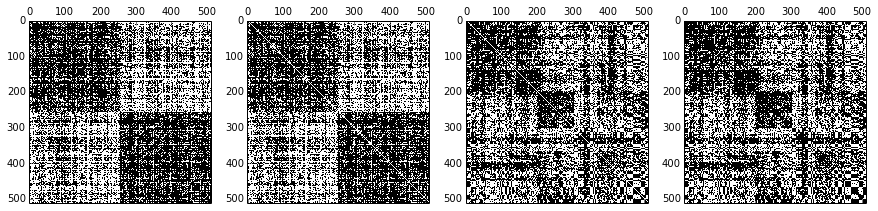

In [11]:
Td.mapMatrices([SCE1, SCE2, mats['SCE_512']['t04_1'], SCE4], disp='spy', lign=1, fs=(15,5))

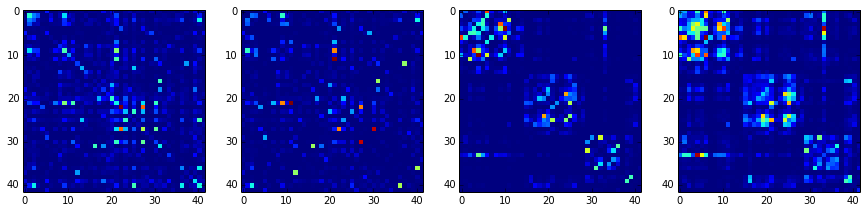

In [11]:
Td.mapMatrices([SCE1[:42,:42], SCE2[:42,:42], mats['SCE_512']['t04_1'][:42,:42], SCE4[:42,:42]], 
               disp='imshow', interpolation='nearest',lign=1, fs=(15,5))

## Saving

## Order procedure

## Changing To AAL order

## Downsampling

---
# Structural Connectivity

## Empirical

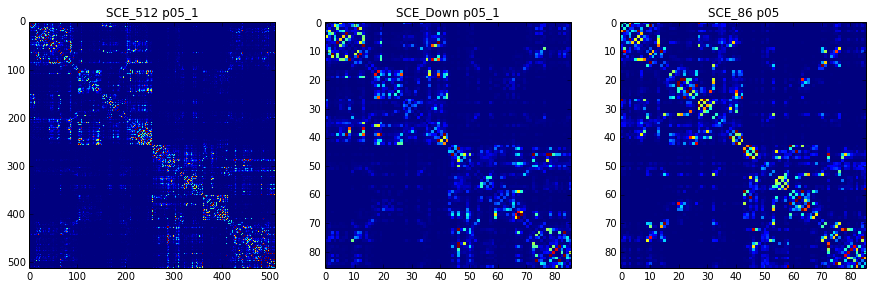

In [45]:
Cj.view_mats(['SCE_512', 'SCE_Down', 'SCE_86'], mats, orders, vmax1=(0.,10.), vmax2=(0.,10.), vmax3=(0.,1000.), cmap='Spectral_r')

---
# Structural Connectivity

## Analytical

* $SCA = inv(FCE)$
* $SCA_{i,i} = 0,\ \forall i \in\ \text{nodes}$
* $SCA^{Down}$ is made from $??\ SCA^{512}$ instead of $FCE^{Down}\ ??$ (inter-individual variability to low)
* The threshold $s$ have to be different from 0 to forbid high values in SCA

### Threshold = 0.0001

In [5]:
typ, s = 'SCA', 0.001
for N in ['512', '86']:#, 'Down']:
    mats[typ+'_'+N] = {}
    for k in mats['FCE_'+N].keys():
        tmp = Tm.seuil(mats['FCE_'+N][k], s)
        tmp = where(tmp < 0., 0., tmp)
        tmp = Cj.SCfromFC(tmp)
        tmp-= diag(diag(tmp))
        mats[typ+'_'+N][k] = array(tmp)
        Te.array2data(tmp, dirM + '%s/%s/%s.npy'%(N,typ,k))
        
        if N == '512':
            tmp = Td.downsample(mats[typ+'_'+N][k], org=orders['Do86'], allAxis=1)
            tmp -= diag(diag(tmp))
            mats[typ+'_Down'][k] = array(tmp)
            Te.array2data(tmp, dirM + 'Down/%s/%s.npy'%(typ,k))
        #print mats[typ+'_'+N][k].max(), (abs(mats['FCE_'+N][k])<1e-7).sum()

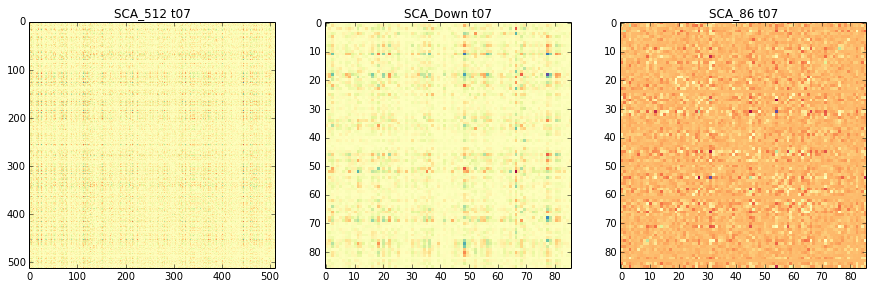

In [6]:
Cj.view_mats(['SCA_512', 'SCA_Down', 'SCA_86'], mats, orders, cmap='Spectral_r')

### Influence of a threshold on FCE to generate SCA

* Low threshold $\rightarrow$ all the connexions


* Better correlation FCA/SCE for high threshold.
* Removing the diagonal of SCA have an influence on the correlations.
* Same influence on the correlation of SCA with FCE or SCE.

In [32]:
fc = array(mats['FCE_512']['t05'])
sc1 = Cj.SCfromFC(Tm.seuil(fc, 0.1), deldiag=False)
sc2 = Cj.SCfromFC(Tm.seuil(fc, 0.3), deldiag=False)
sc3 = Cj.SCfromFC(Tm.seuil(fc, 0.6), deldiag=False)
nm = ['FCE', 'SCA_s=0.1', 'SCA_s=0.3', 'SCA_s=0.6']

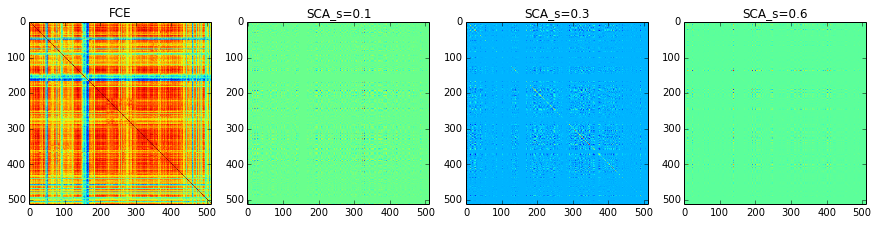

In [33]:
Td.mapMatrices([fc, sc1, sc2, sc3], nm, fig=figure(figsize=(15,5)), lign=1)

In [144]:
def compSeuil(m, m2=None, deldiag=False, lbl=None):
    c = []
    S = linspace(0.,1.,50)
    if m2 == None:
        m2 = array(m)
    for s in S:
        m3 = Tm.seuil(m, s)
        m3 = Cj.SCfromFC(m3, deldiag=deldiag)
        c.append( Tm.triSupPearsonCor(m3, m2) )

    plot(S, c, label=lbl); xlabel('Threshold'); ylabel('Correlation'); ylim(-1,1)
    if lbl !=None: legend(loc=4)

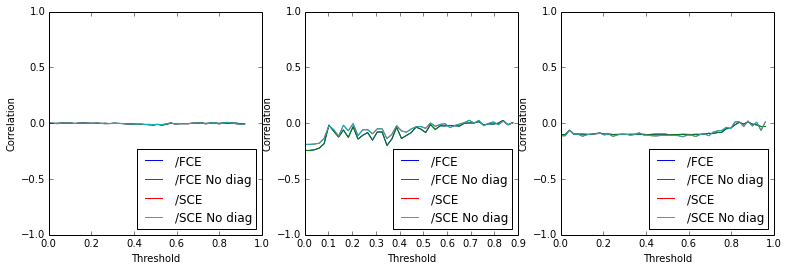

In [145]:
figure(figsize=(13,4)); sub = 't05'
subplot(131)
compSeuil(mats['FCE_512'][sub], lbl='/FCE')
compSeuil(mats['FCE_512'][sub], deldiag=True, lbl='/FCE No diag')
compSeuil(mats['FCE_512'][sub], mats['SCE_512'][sub+'_1'], lbl='/SCE')
compSeuil(mats['FCE_512'][sub], mats['SCE_512'][sub+'_1'], deldiag=True, lbl='/SCE No diag')
subplot(132)
compSeuil(mats['FCE_Down'][sub], lbl='/FCE')
compSeuil(mats['FCE_Down'][sub], deldiag=True, lbl='/FCE No diag')
compSeuil(mats['FCE_Down'][sub], mats['SCE_Down'][sub+'_1'], lbl='/SCE')
compSeuil(mats['FCE_Down'][sub], mats['SCE_Down'][sub+'_1'], deldiag=True, lbl='/SCE No diag')
subplot(133)
compSeuil(mats['FCE_86'][sub], lbl='/FCE')
compSeuil(mats['FCE_86'][sub], deldiag=True, lbl='/FCE No diag')
compSeuil(mats['FCE_86'][sub], mats['SCE_86'][sub], lbl='/SCE')
compSeuil(mats['FCE_86'][sub], mats['SCE_86'][sub], deldiag=True, lbl='/SCE No diag')

---
# Functional Connectivity
## Empirical

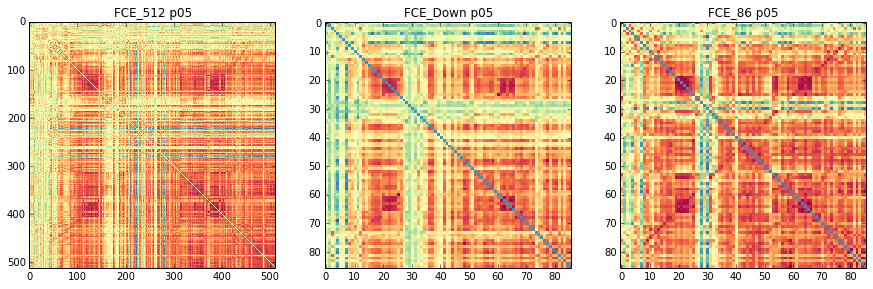

In [87]:
Cj.view_mats(['FCE_512', 'FCE_Down', 'FCE_86'], mats, orders, diag=0, cmap='Spectral_r')

### Verification FCE from times series

In [42]:
dirJ = '../../../ProjectJonathan/Jonathan/512/'
amlr512 = Te.dir2array(dirJ + "Adjacency_matrix_nlevels_2_nregions_512_nb.edges_13000/", dic=True, finite=True)
gmss512 = Te.dir2array(dirJ + "grey_matter_sansSB_sansLCR_ROI_512_ts/", dic=True, finite=True)
wcof512 = Te.dir2array(dirJ + "wave.coef.mat_n.levels_2_n.regions_512/", dic=True, finite=True)
wcor512 = Te.dir2array(dirJ + "wave.cor.mat_n.levels_2_n.regions_512/", dic=True, finite=True)
Jonatha = Te.dir2array("../../../Connectomes/Jonathan/512/FCE_84J/", dic=True, finite=True)
tFC0, tFC1, tFC2 = {}, {}, {}
for k in amlr512.keys():
    tFC0[k] = amlr512[k] * wcor512[k]
    tFC1[k] = Tf.fPearsonCorrelation(gmss512[k])
    tFC2[k] = Tf.fPearsonCorrelation(wcof512[k][21:])

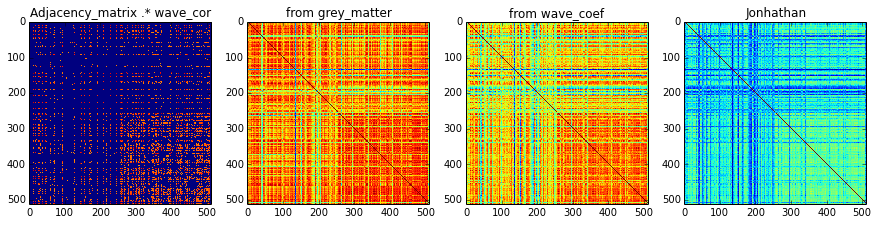

In [43]:
typ = 'p05'
mmm = tFC0[typ], tFC1[typ], tFC2[typ], Jonatha[typ]
nnn = ['Adjacency_matrix .* wave_cor', 'from grey_matter', 'from wave_coef', 'Jonhathan']
Td.mapMatrices(mmm, nnn, lign=1, fig=figure(figsize(15,5)), interpolation='nearest')

In [48]:
print Tm.triSupPearsonCor(tFC1[typ], Jonatha[typ])
print Tm.triSupPearsonCor(tFC2[typ], Jonatha[typ])

0.818620665237
0.997278145775


---
# Functional Connectivity
## Analytical

* Critical parameter : $p_c = 1 / max(eigvalues(SC))$
* $SCE_{i,i} = 0,\ \forall i$
* $FCA = - inv(p . p_c . SCE - Id)),\ \text{for}\ p \in ]0;1[$
* $FCA^{Down}$ is made from $SCE^{Down}$ instead of $FCA^{512}$ (inter-individual variability to low)

In [128]:
typ = 'FCA'
for N in ['512', '86']:
    mats[typ+'_'+N] = {}
    for k in mats['SCE_'+N].keys():
        mats[typ+'_'+N][k] = Cj.FCfromSC(mats['SCE_'+N][k], p=0.95)
        Te.array2data(mats[typ+'_'+N][k], dirM + '%s/%s/%s.npy'%(N,typ,k))
        
        if N == '512':
            tmp = Td.downsample(mats[typ+'_'+N][k], org=orders['Do86'], allAxis=1)
            tmp -= diag(diag(tmp))
            tmp += diag(ones(len(tmp)))
            mats[typ+'_Down'][k] = array(tmp)
            Te.array2data(tmp, dirM + 'Down/%s/%s.npy'%(typ,k))

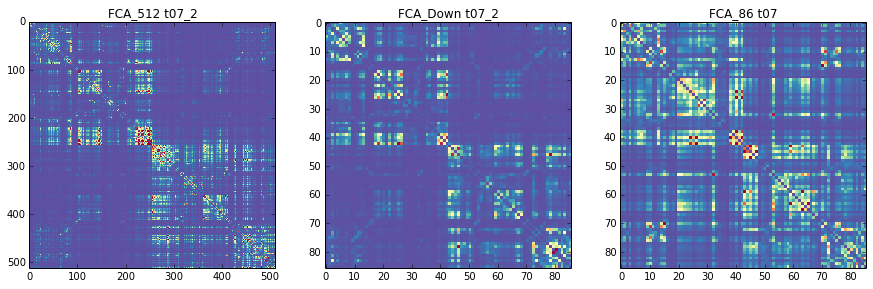

In [371]:
Cj.view_mats(['FCA_512', 'FCA_Down', 'FCA_86'], mats, orders, diag=0, cmap='Spectral_r', vmax1=(0.,2.), vmax2=(0.,2.), vmax3=(0.,2.))

## Influence of $p$ on FCA

In [5]:
cors, cors2 = [], []
m = Tm.seuil(mats['SCE_86']['p06'], 0.)
f = array(mats['FCE_86']['p06'])
ran = linspace(0.9,1.1,100)
for p in ran:
    s = Cj.FCfromSC(m, p=p)
    cors.append(Tm.triSupPearsonCor(m, s))
    cors2.append(Tm.triSupPearsonCor(f, s))

**86 Nodes**

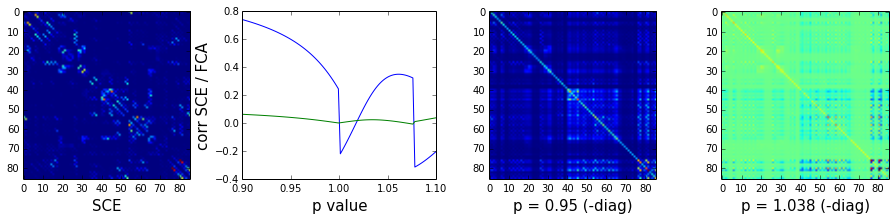

In [6]:
figure(figsize=(16,3))
subplot(141); imshow(m); xlabel('SCE', fontsize=15)
subplot(142); plot(ran, cors), plot(ran, cors2)
xlim(ran.min(), ran.max()); xlabel('p value', fontsize=15); ylabel('corr SCE / FCA', fontsize=15);
subplot(143); s = Cj.FCfromSC(m, p=0.95);  imshow(s); xlabel('p = 0.95 (-diag)', fontsize=15)
subplot(144); s = Cj.FCfromSC(m, p=1.038);  imshow(s); xlabel('p = 1.038 (-diag)', fontsize=15);

In [7]:
cors, cors2 = [], []
m = Tm.seuil(mats['SCE_512']['p06_1'], 0.)
f = array(mats['FCE_512']['p06'])
ran = linspace(0.9,1.1,20)
for p in ran:
    s = Cj.FCfromSC(m, p=p)
    cors.append(Tm.triSupPearsonCor(m, s))
    cors2.append(Tm.triSupPearsonCor(f, s))

**512 Nodes**

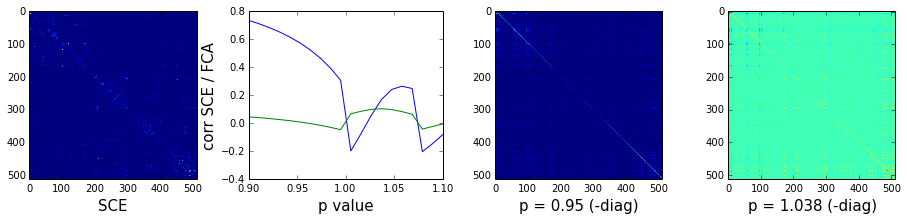

In [8]:
figure(figsize=(16,3))
subplot(141); imshow(m); xlabel('SCE', fontsize=15)
subplot(142); plot(ran, cors), plot(ran, cors2)
xlim(ran.min(), ran.max()); xlabel('p value', fontsize=15); ylabel('corr SCE / FCA', fontsize=15);
subplot(143); s = Cj.FCfromSC(m, p=0.95);  imshow(s); xlabel('p = 0.95 (-diag)', fontsize=15)
subplot(144); s = Cj.FCfromSC(m, p=1.038);  imshow(s); xlabel('p = 1.038 (-diag)', fontsize=15);

## Influence of $p$ & $s$ on FCA

**86 Nodes**

In [ ]:
FCA, lTitl, SCE = [],[],[]
ss = linspace(0, 100, 11)
ran = linspace(0.9, 1.1, 11)
for s in ss:
    for p in ran:
        SCE.append(Tm.seuil(mats['SCE_86']['p06'], s))
        FCA.append( Cj.FCfromSC(SCE[-1], p=p) )
        lTitl.append('%.2f_%i'%(p,s))

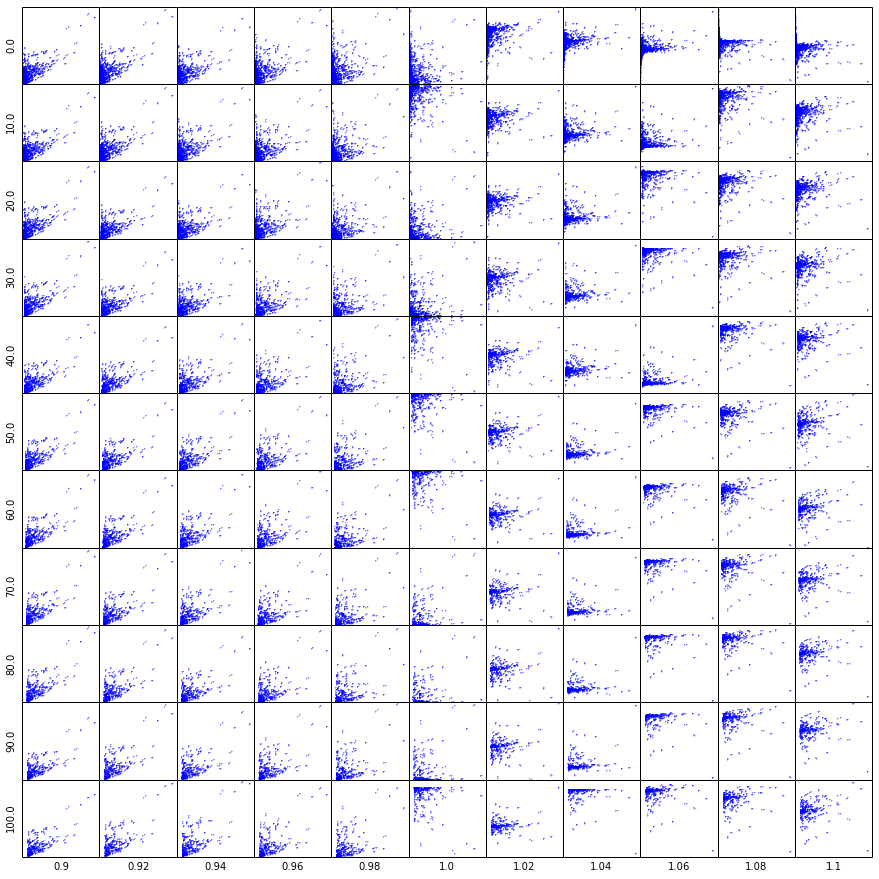

In [12]:
Td.mapMatrices([FCA[k][SCE[k]!=0] for k in range(len(FCA))], lX=[SCE[k][SCE[k]!=0] for k in range(len(FCA))], 
               labels=[ran,ss], shAll=False, fig=figure(figsize=(12,12)), disp='plot', grid='subplot', 
               multp=0, ncl=(11,11), ls=' ', marker='+', ms=1, alpha=1, axV=0)
tight_layout(pad=0)

**512 Nodes**

In [ ]:
FCA, lTitl, SCE = [],[],[]
ss = linspace(0, 5, 11)
ran = linspace(2., 2.5, 11)
for s in ss:
    for p in ran:
        SCE.append(Tm.seuil(mats['SCE_512']['p06_1'], s))
        FCA.append( Cj.FCfromSC(SCE[-1], p=p) )
        lTitl.append('%.2f_%.2f'%(p,s))

In [12]:
nb = array(mats['SCE_512']['t04_1'])
de = array(SCE4)

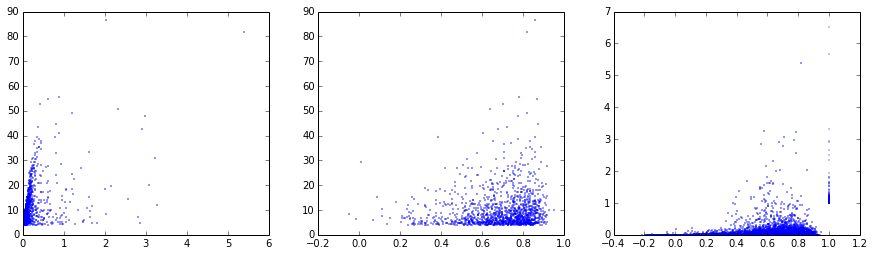

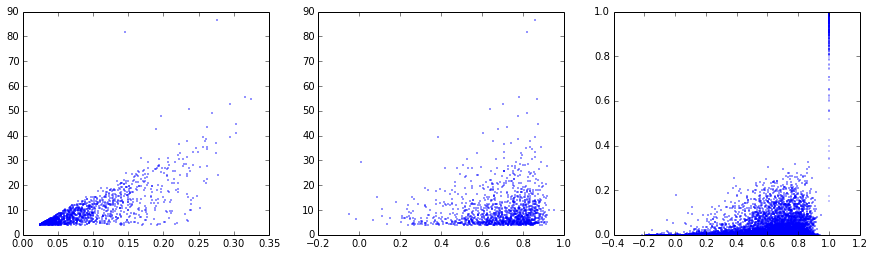

In [15]:
SCE = Tm.seuil(nb, 4)
FCA = Cj.FCfromSC(SCE, p=0.96)
FCAC = zeros(FCA.shape)
for i in range(len(FCAC)):
    for j in range(len(FCAC)):
        FCAC[i,j] = FCA[i,j] / FCA[i,i] / FCA[j,j]
figure(figsize=(15,4))
subplot(131); plot(FCA[SCE!=0],SCE[SCE!=0], '.', ms=1);
subplot(132); plot(mats['FCE_512']['t04'][SCE!=0], SCE[SCE!=0], '.', ms=1);
subplot(133); plot(mats['FCE_512']['t04'][FCA!=0], FCA[FCA!=0], '.', ms=1);
figure(figsize=(15,4))
subplot(131); plot(FCAC[SCE!=0],SCE[SCE!=0], '.', ms=1);
subplot(132); plot(mats['FCE_512']['t04'][SCE!=0], SCE[SCE!=0], '.', ms=1);
subplot(133); plot(mats['FCE_512']['t04'][FCAC!=0], FCAC[FCAC!=0], '.', ms=1);

In [35]:
def CorrFromCov(V):
    R = zeros(V.shape)
    for i in range(len(R)):
        for j in range(len(R)):
            R[i,j] = V[i,j] / sqrt(V[i,i] * V[j,j])
    return V

In [36]:
FCE = array(mats['FCE_512']['t04'])
S_M = array(SCE4) - diag(diag(SCE4))
S_T = array(mats['SCE_512']['t04_1'])
F_M = CorrFromCov(Cj.FCfromSC(Tm.seuil(S_M, 0.), p=0.96))
F_T = CorrFromCov(Cj.FCfromSC(Tm.seuil(S_T, 0.), p=0.96))
F_M += 1 - diag(diag(F_M))
F_T += 1 - diag(diag(F_T))

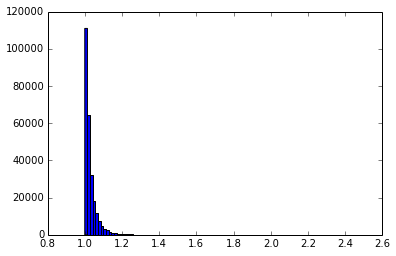

In [40]:
hist(F_M.flatten(),100);

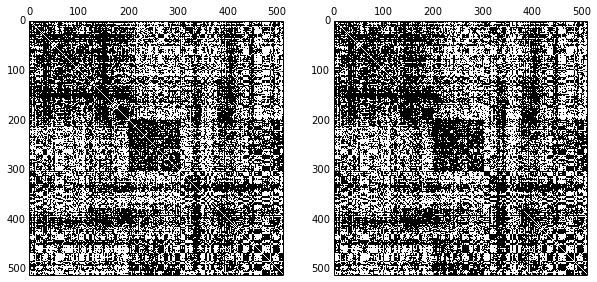

In [15]:
Td.mapMatrices([S_M, S_T], disp='spy', fs=(10,10))

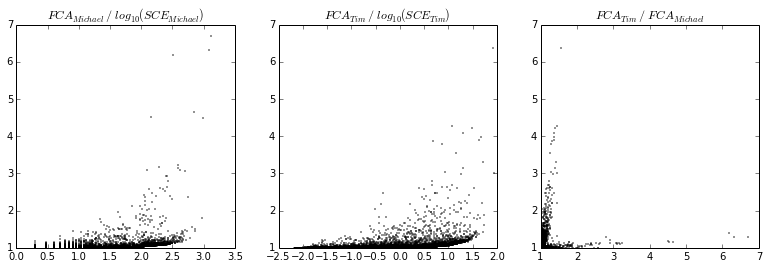

In [25]:
figure(figsize=(18,4))
subplot(141); plot(log10(S_M), F_M, 'k.', ms=1); title(r'$FCA_{Michael}\ /\ log_{10}(SCE_{Michael})$')
subplot(142); plot(log10(S_T), F_T, 'k.', ms=1); title(r'$FCA_{Tim}\ /\ log_{10}(SCE_{Tim})$')
subplot(143); plot(F_M, F_T, 'k.', ms=1); title(r'$FCA_{Tim}\ /\ FCA_{Michael}$');

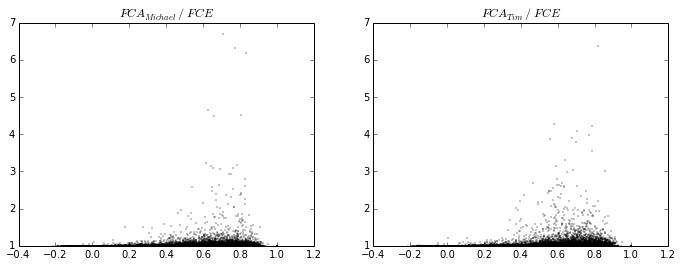

In [26]:
figure(figsize=(18,4))
subplot(131); plot(FCE, F_M, 'k.', ms=1, alpha=0.5); title(r'$FCA_{Michael}\ /\ FCE$')
subplot(132); plot(FCE, F_T, 'k.', ms=1, alpha=0.5); title(r'$FCA_{Tim}\ /\ FCE$');

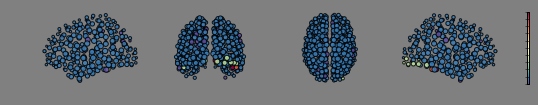

In [94]:
centres = Te.data2array('../../../Connectomes/Jonathan/512/centres/p06.npy')[:,1:]
Td.parcelFromCenters((FCA>1.).mean(0), centres, s=0.5, alpha=0.85, intext=0, cbar=1, lign=1)

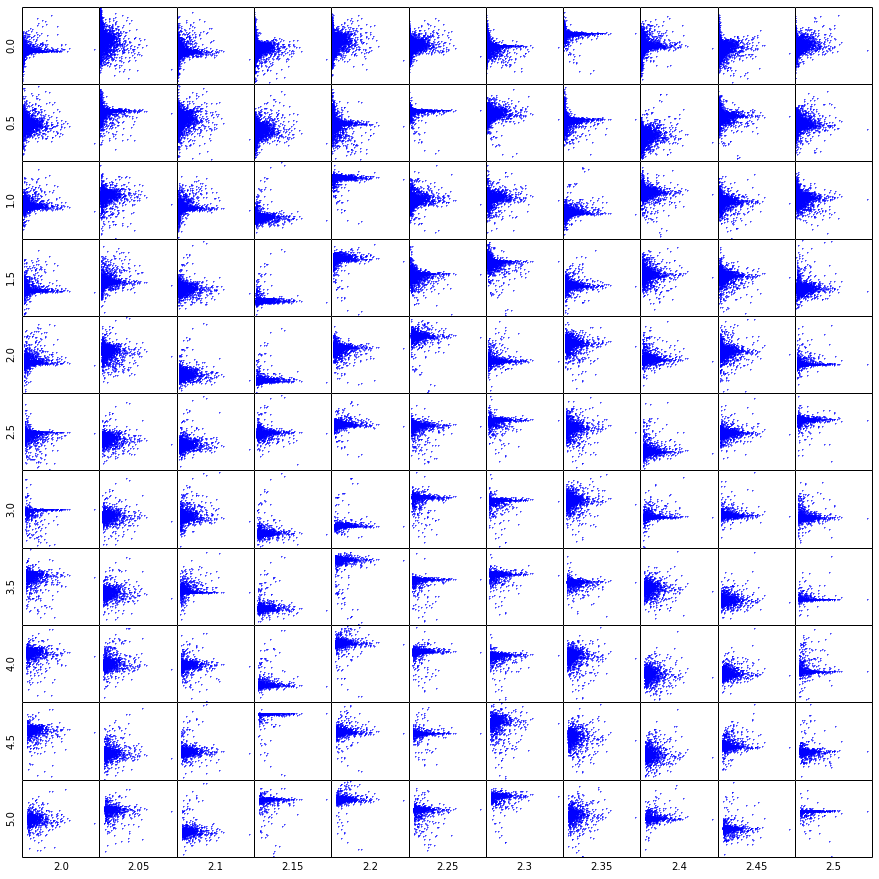

In [14]:
Td.mapMatrices([FCA[k][SCE[k]!=0] for k in range(len(FCA))], lX=[SCE[k][SCE[k]!=0] for k in range(len(FCA))], 
               labels=[ran,ss], shAll=False, fig=figure(figsize=(12,12)), disp='plot', grid='subplot',
               multp=0, ncl=(11,11), ls=' ', marker='+', ms=1, alpha=1, axV=0)
tight_layout(pad=0)

---
# Functional Connectivity
## From Attractors

Simulation runned on an Hopfield based model on deterministic case to find attractors.

* Without noise to reach the equilibrium
* 3300 times $\rightarrow$ ~200 attractors
* Common parameters for each SCE to reach the maximum number of attractors
* FCP is then the correlations between the attractors weightened by their predominance

Only one set of patterns for $f_0=0.5$ for each FCP

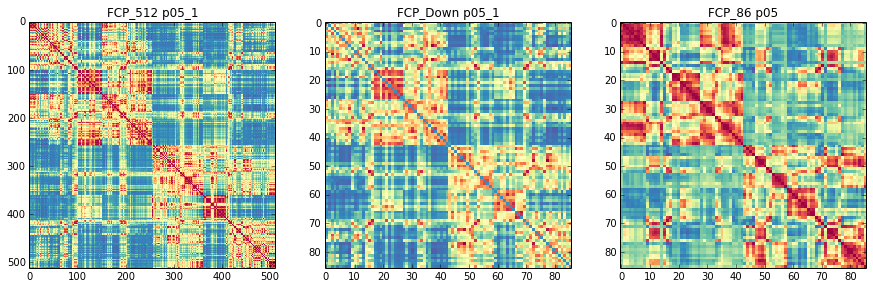

In [89]:
Cj.view_mats(['FCP_512', 'FCP_Down', 'FCP_86'], mats, orders, cmap='Spectral_r')

---
# Variance

* Variance between only two matrices $i$ et $j$:

$Vars_{i,j} = \sum_{\substack{nodes \\nodes}}(\frac{M_i - M_j}{2})^2$

In [87]:
Td.tic()
try:    Vars
except: Vars = {}
for k in mats.keys():
    if 'centres' not in k:
        Vars[k] = Cj.funcVar(mats[k])
Td.tac()
Te.array2data(Vars, dirM + 'Vars.mat')

Time elapsed: 7.11s


In [376]:
Vars = Te.data2array(dirM + 'Vars.mat')
for k in ['__header__', '__globals__', '__version__']: del Vars[k]

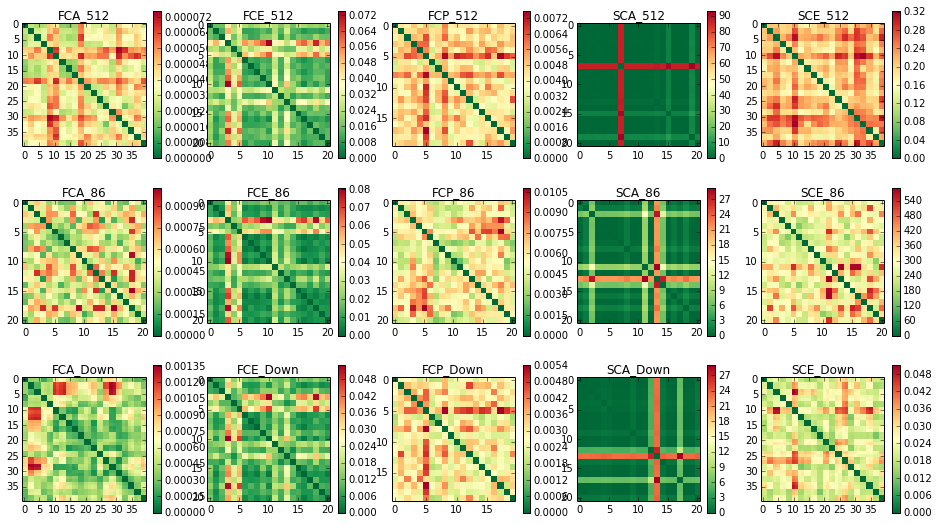

In [88]:
Td.mapMatrices([Vars[k] for k in sorted(Vars.keys())],
               [k for k in sorted(Vars.keys())],
               fig=figure(figsize=(16,9)), interpolation='nearest', cmap='RdYlGn_r', ncl=(5,3), transp=1, cbar=True)

---
# Correlations

Pearson correlation for each couples : $\{\bar{\bar{M^i}},\bar{\bar{N^j}}\}$

* $\forall M,N \in [SCE,SCA,FCE,FCA,FCP]$
* $\forall i,j \in [512,Down,86]$
* except $\{i,j\}=\{512,86\}$
* average of all the column (or rows) correlation : $\sum_{k}corr(\bar{M^i_k}, \bar{N^j_k)}/n_{nodes}$

In [378]:
KS = mats.keys()
KS.remove('centres_512')
KS.remove('centres_86')
KS.remove('centres_Down')
KS.sort()

In [30]:
try:    Corrs
except: Corrs = {}
Td.tic()
for ik1 in range(len(KS)):
    for ik2 in range(ik1, len(KS)):
        if ik1 == ik2 and KS[ik1] not in Corrs.keys():
            Corrs[KS[ik1]] = Cj.PCorr(mats[KS[ik1]], mats[KS[ik2]])
        elif (KS[ik1] + ' / ' + KS[ik2] not in Corrs.keys()):
            if '512' in KS[ik1] and '512' in KS[ik2]\
            or '86'  in KS[ik1] and '86'  in KS[ik2]\
            or 'Do'  in KS[ik1] and '86'  in KS[ik2]\
            or '86'  in KS[ik1] and 'Do'  in KS[ik2]\
            or 'Do'  in KS[ik1] and 'Do'  in KS[ik2]:
                Corrs[KS[ik1] + ' / ' + KS[ik2]] = Cj.PCorr(mats[KS[ik1]], mats[KS[ik2]])
Td.tac()
Te.array2data(Corrs, dirM + 'Corrs.mat')

Time elapsed: 607.24s


In [346]:
Corrs = Te.data2array(dirM + 'Corrs.mat')
for k in ['__header__', '__globals__', '__version__']: del Corrs[k]

In [381]:
tCorrs = {}
for k in Corrs.keys():
    tCorrs[k] = Corrs[k] - Corrs[k].mean(0)
    tCorrs[k] -= tCorrs[k].mean(1)[:,newaxis]

In [351]:
for k in tCorrs.keys():
    if 'Down' in k:
        del tCorrs[k]

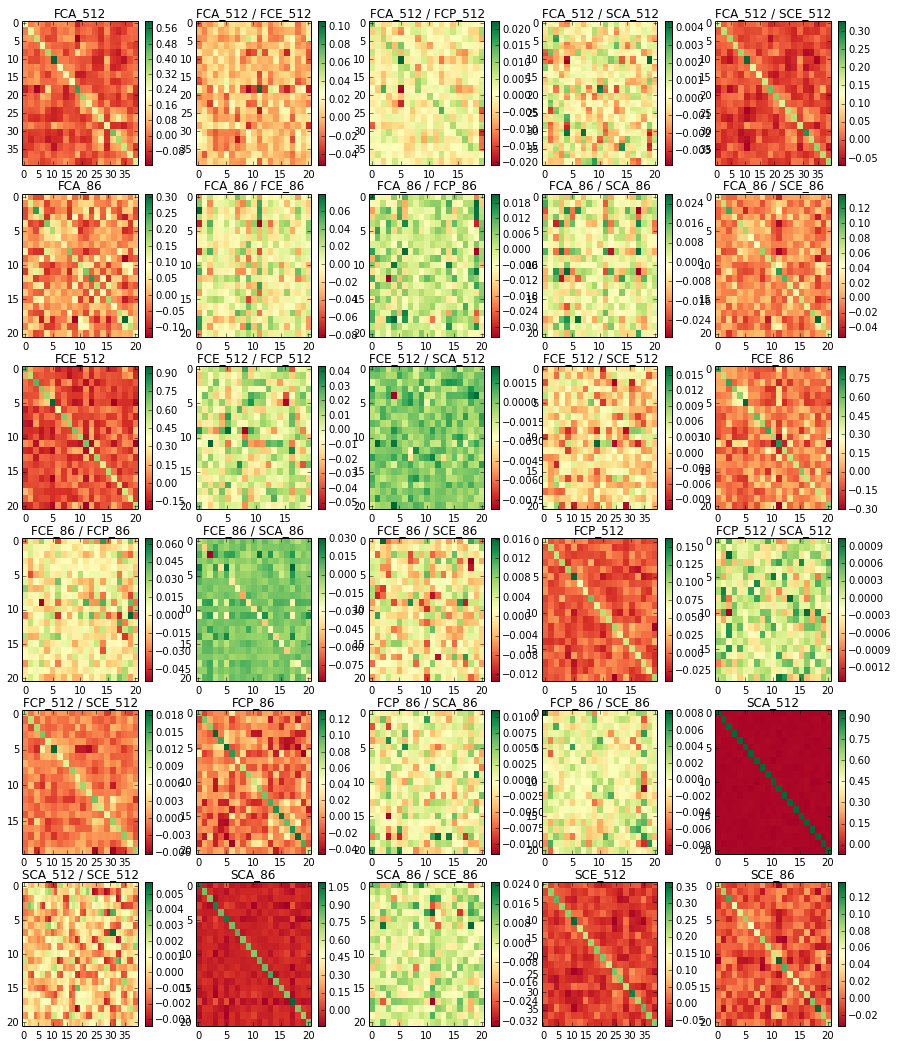

In [354]:
Td.mapMatrices([tCorrs[k] for k in sort(tCorrs.keys())],
               [k for k in sort(tCorrs.keys())],
               fig=figure(figsize=(15,len(tCorrs.keys())*3/5)), interpolation='nearest', cmap='RdYlGn', 
               ncl=(len(tCorrs.keys())/5,5), aspect='auto', cbar=1)

### Display connectivities depending on the others

*  $M^{86}_{i,j} = f(N^{86}_{i,j})$
* $\forall M,N \in [SCE,SCA,FCE,FCA,FCP]$
* for one subject

**...**

In [5]:
def AB(typ, N):
    mmm, K = [], ['SCE','SCA','FCE','FCA','FCP']
    if N == 'Down': Nb = 86
    else:           Nb = N
    for i in range(5):
        for j in range(5):
            try:    A = array(mats['%s_%s'%(K[i], N)][typ]);      A-= diag(diag(A)); A = A.reshape((Nb**2))
            except: A = array(mats['%s_%s'%(K[i], N)][typ+'_1']); A-= diag(diag(A)); A = A.reshape((Nb**2))
            try:    B = array(mats['%s_%s'%(K[j], N)][typ]);      B-= diag(diag(B)); B = B.reshape((Nb**2))
            except: B = array(mats['%s_%s'%(K[j], N)][typ+'_1']); B-= diag(diag(B)); B = B.reshape((Nb**2))
            mmm.append([A, B, '%s / %s'%(K[i],K[j])])
    return array(mmm)

#### 86 Nodes

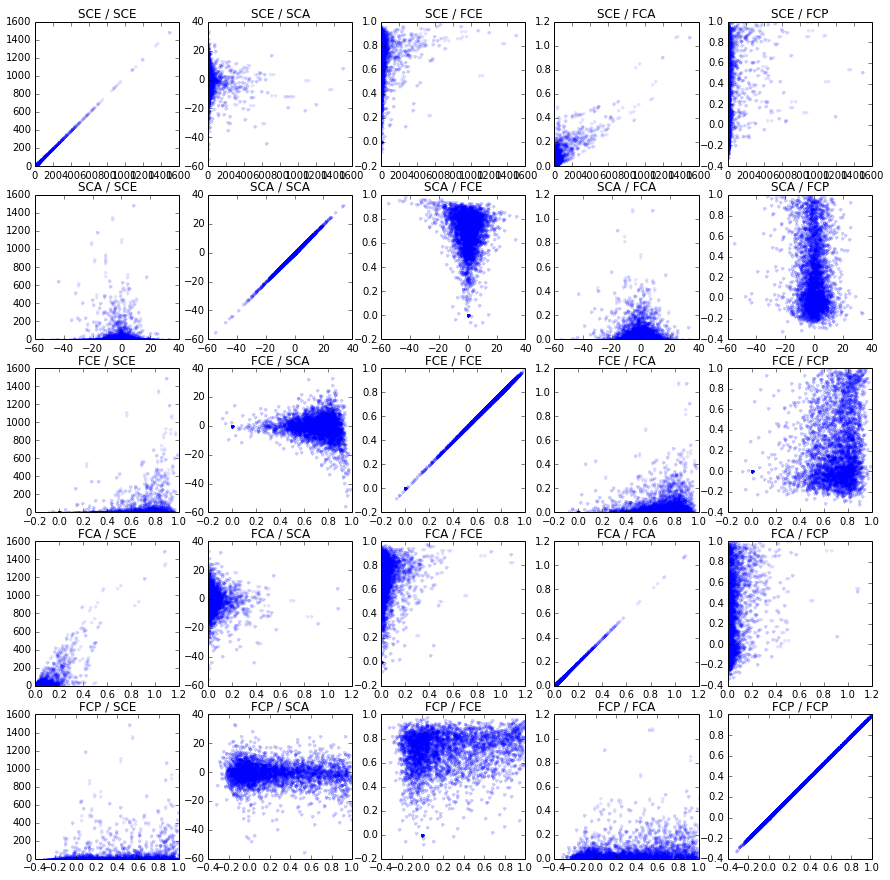

In [7]:
mmm = AB('p06', 86)
Td.mapMatrices(lMat=mmm[:,1], lX=mmm[:,0], lTitl=mmm[:,2], fig=figure(figsize=(15,15)), 
               disp='plot', grid='subplot', multp=0, ncl=(5,5), ls=' ', marker='.', alpha=0.1)

#### 512 Nodes

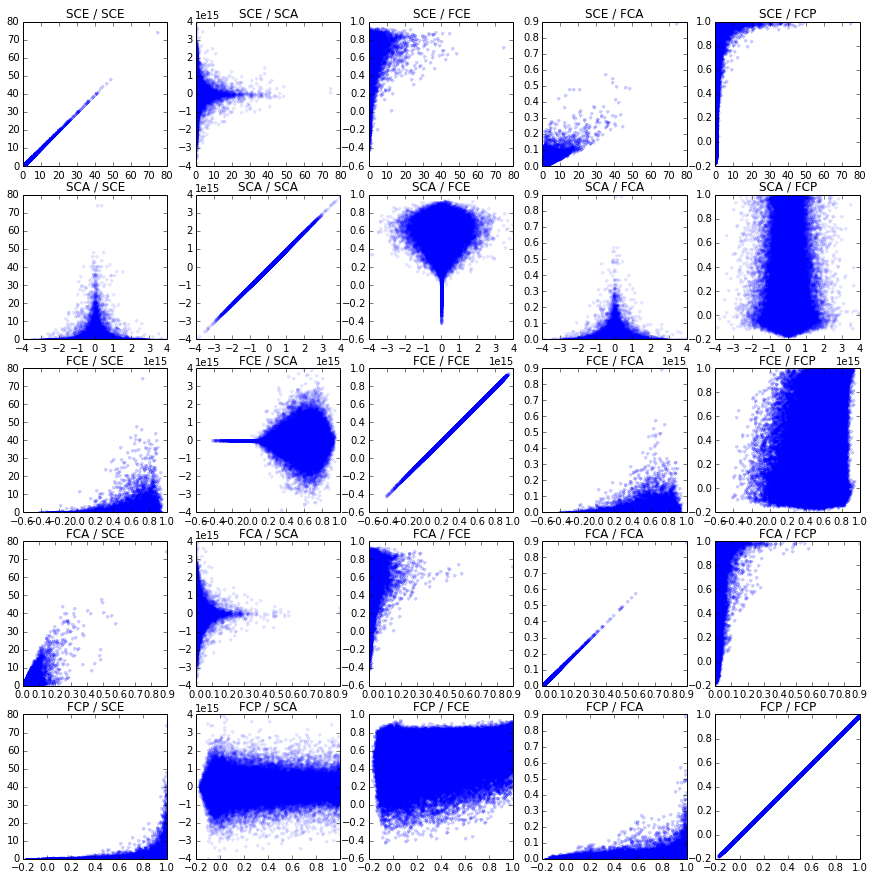

In [8]:
mmm = AB('p06', 512)
Td.mapMatrices(lMat=mmm[:,1], lX=mmm[:,0], lTitl=mmm[:,2], fig=figure(figsize=(15,15)), 
               disp='plot', grid='subplot', multp=0, ncl=(5,5), ls=' ', marker='.', alpha=0.1)

---
# Inter-individual Correlations between ...

### SCE 86 nodes & SCE downsampled

* Better with a more apparent diagonal 
* But highest "down/86" correlation (0.78) lower than the lowest "86/86" correlation (0.91)

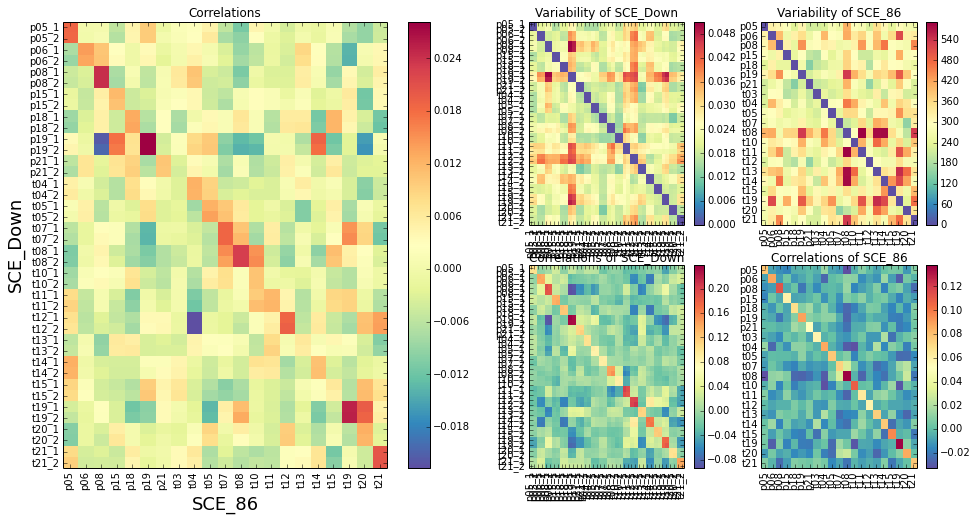

In [386]:
Cj.view_corrs(mats, tCorrs, Vars, KS, cmap='Spectral_r')

### FCE 86 nodes & FCE downsampled

* There should be a diagonal
* And higher correlations

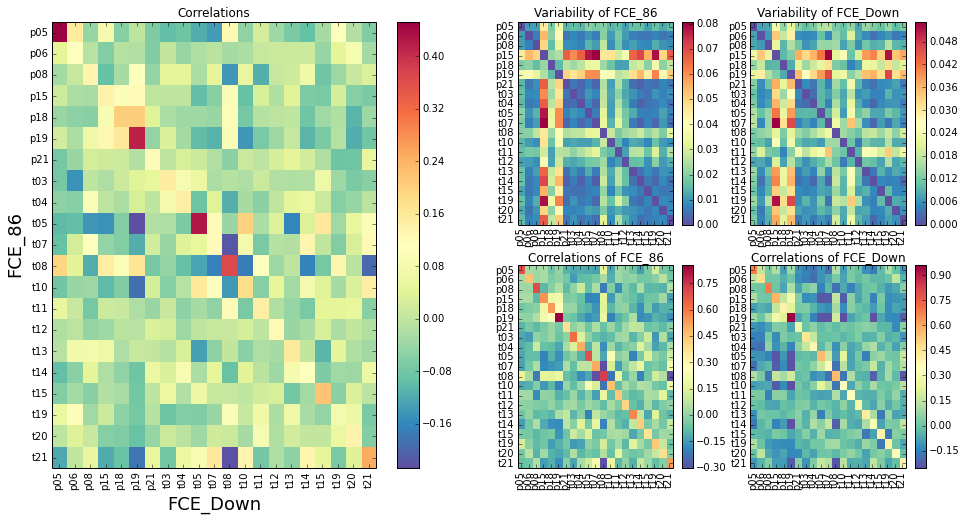

In [390]:
Cj.view_corrs(mats, tCorrs, Vars, KS, cmap='Spectral_r')

### FCE & SCE

* No relation between FCE and SCE
* If no problem from FCE, relation $\rightarrow$ non linear

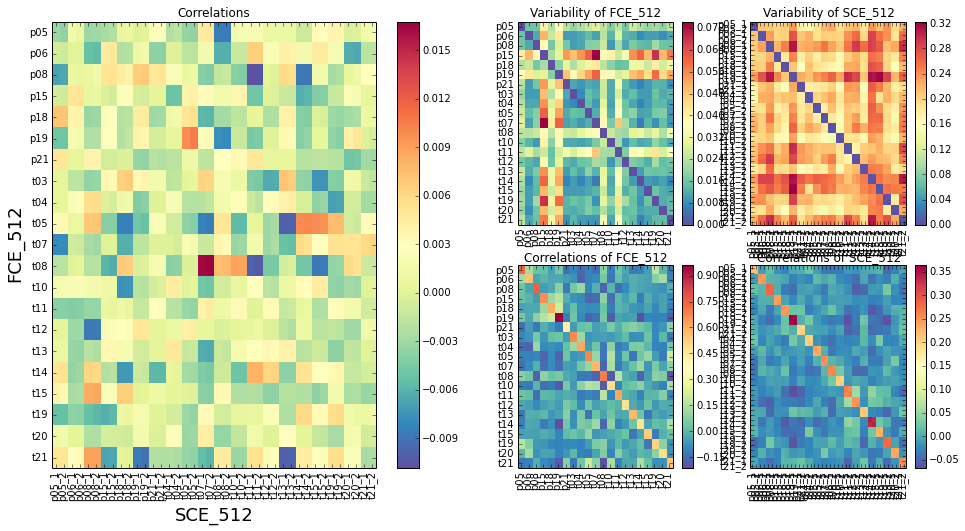

In [389]:
Cj.view_corrs(mats, tCorrs, Vars, KS, cmap='Spectral_r')

### FCP 86 nodes & FCP downsampled

Is patients clusterized on FVP 86 correlation ?

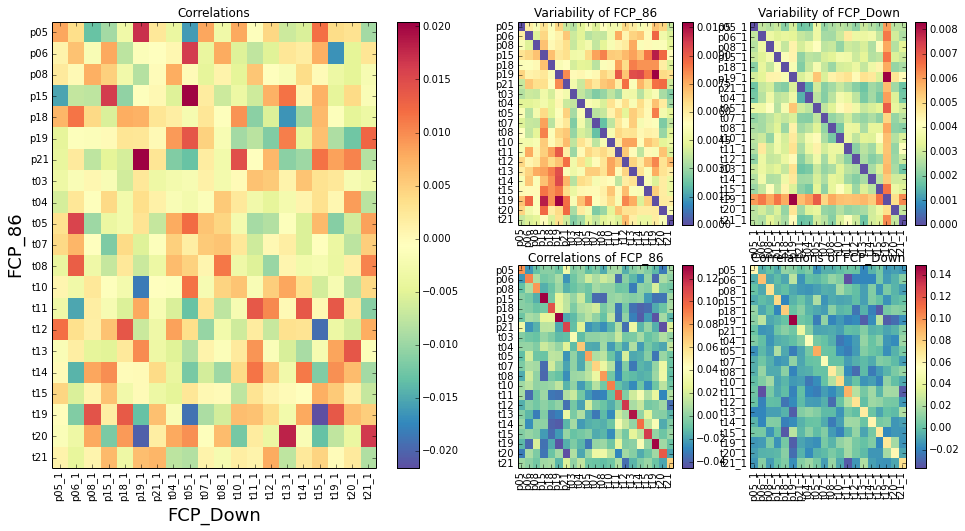

In [391]:
Cj.view_corrs(mats, tCorrs, Vars, KS, cmap='Spectral_r')

### FCP & SCE

* FCP based on SCE
* Diagonal for 512 nodes but not for 86

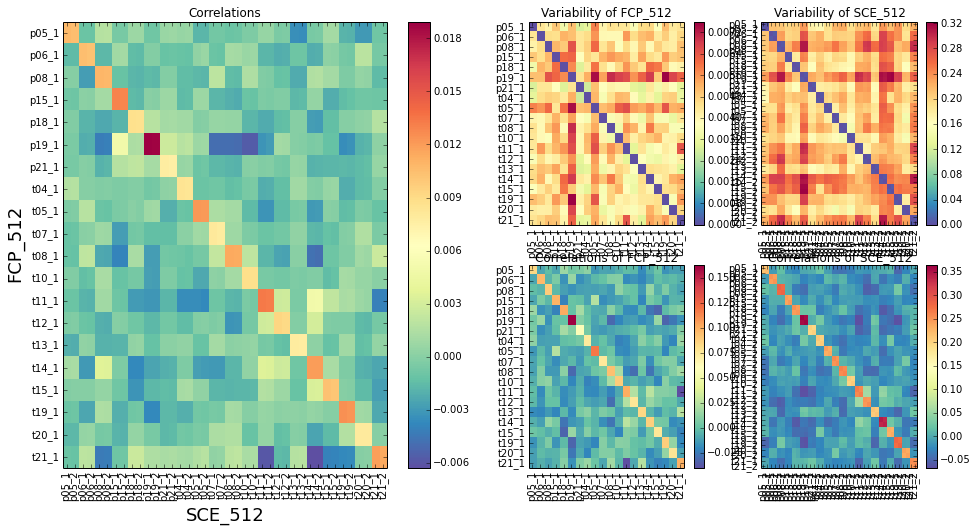

In [392]:
Cj.view_corrs(mats, tCorrs, Vars, KS, cmap='Spectral_r')

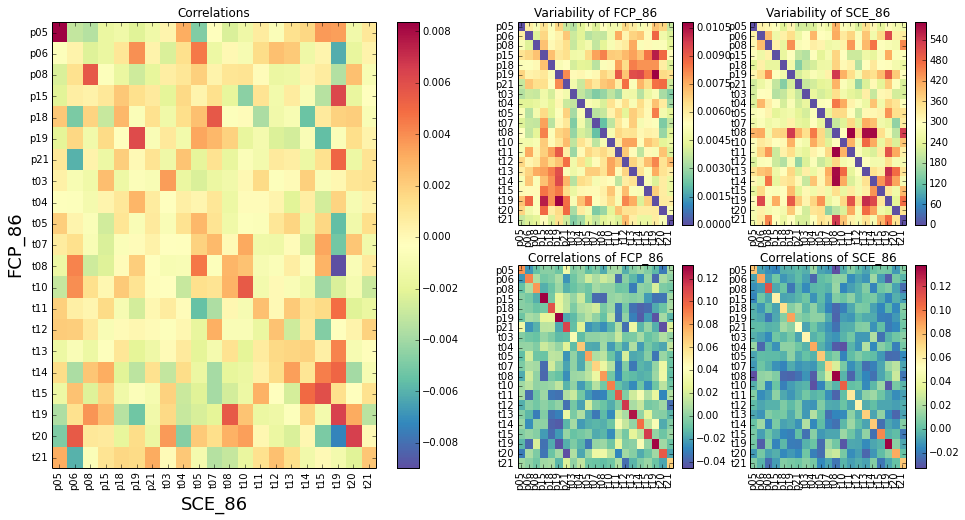

In [393]:
Cj.view_corrs(mats, tCorrs, Vars, KS, cmap='Spectral_r')

---
# Kmeans Clustering

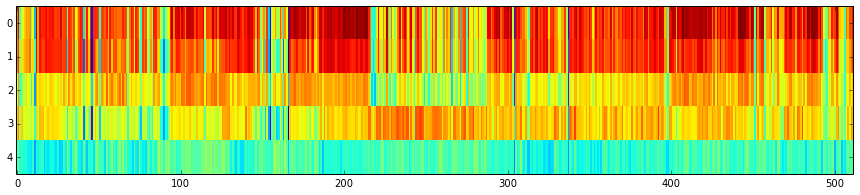

In [409]:
Sk = Tm.Kmeans(mats['FCE_512']['p21'], 5)
SS = Sk[Tf.sortBy(abs(Sk).mean(1), inverse=1)[0]]
Td.mapMatrices([SS], fig=figure(figsize=((15,3))), aspect='auto', interpolation='nearest', lign=1)

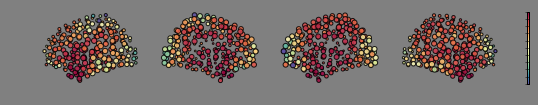

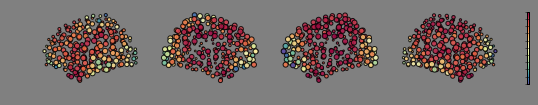

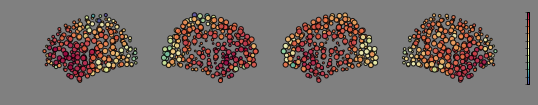

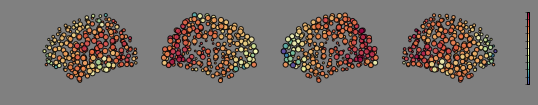

In [410]:
for patt in SS[:-1]:
    Td.parcelFromCenters(patt, mats['centres_512']['p21'][:,[1,2,3]], s=0.5, alpha=0.85, intext=1, cbar=1, lign=1)

---
# ... Others

In [59]:
from qutip.ipynbtools import version_table
version_table()

In [90]:
Td.noteToSlides('./Main.ipynb', ie=True)